## Note
- Author: Luke Arunanondchai
- Last version: 2/22/2019
- Software: Python 3.7
- Purpose of Work: AC Interview Results
- Project: ARM

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame, Series

df1 = pd.read_stata("..\\input\\AC interview results.dta")
info = df1[['firm', 'year', 'cik', 'cik_iq', 'role', 'name','sic']]
resp = df1.filter(regex="d_[a-z]+")
df2  = pd.concat([info.reset_index(drop=True),resp],axis=1)
lt2 = df2.groupby('cik').count()['firm']<2
lt2 = lt2[lt2==True].index.values
eq2 = df2.groupby('cik').count()['firm']==2
eq2 = eq2[eq2==True].index.values
gt2 = df2.groupby('cik').count()['firm']>2
gt2 = gt2[gt2==True].index.values

# DataFrame of firms with only 1 inspection
df3 = df2[df2.cik.isin(list(eq2))]

# DataFrame of firms with more than 1 inspection
df4 = df2[df2.cik.isin(list(gt2))]

In [2]:
# One inspection
case1 = df3.copy()
d = df3.copy()
case1['ACansCount']  = case1.filter(regex="d_[a-z]+").sum(axis=1)
case1.rename(index = case1['cik'],inplace=True) 
caseT = case1[case1['role']=='AC'].copy()
caseT.sort_values(by=['cik','year'],inplace=True)
case1 = d.drop(['sic'],axis=1).groupby(['cik','year']).sum()
case1.reset_index(inplace=True)
case1.rename(index = case1['cik'],inplace=True)
case1.sort_values(by=['cik','year'],inplace=True)
case1 =pd.concat([case1,caseT['ACansCount']],axis=1)
store1 = case1[['cik','year','ACansCount']]
d.rename(index = d['cik'],inplace=True)
case11 = d.copy()

# Counting the number of matches for each topic
matchC = case11.drop(['sic'],axis=1).groupby(['cik','year']).sum()>=2
matchC.reset_index(inplace=True)
matchC['matchCount'] = matchC.filter(regex="d_[a-z]+").sum(axis=1)
matchC['matched']=0
for i in matchC.index:
    if matchC.loc[i,'matchCount']>=3:
        matchC.loc[i,'matched']=1
        
store11 = matchC[['cik','year','matchCount','matched']]
store_c1 = pd.merge(store1,store11 ,how='outer',on=['cik','year'])
store_c1['nInspection'] = 1

In [3]:
# Two inspections
case1 = df4.copy()
d = df4.copy()
case1['ACansCount']  = case1.filter(regex="d_[a-z]+").sum(axis=1)
case1.rename(index = case1['cik'],inplace=True) 
caseT = case1[case1['role']=='AC'].copy()
caseT.sort_values(by=['cik','year'],inplace=True)
case1 = d.drop(['sic'],axis=1).groupby(['cik','year']).sum()
case1.reset_index(inplace=True)
case1.rename(index = case1['cik'],inplace=True)
case1.sort_values(by=['cik','year'],inplace=True)
case1 =pd.concat([case1,caseT['ACansCount']],axis=1)
store1 = case1[['cik','year','ACansCount']]
d.rename(index = d['cik'],inplace=True)
case11 = d.copy()

# Counting the number of matches for each topic
matchC = case11.drop(['sic'],axis=1).groupby(['cik','year']).sum()>=2
matchC.reset_index(inplace=True)
matchC['matchCount'] = matchC.filter(regex="d_[a-z]+").sum(axis=1)
matchC['matched']=0
for i in matchC.index:
    if matchC.loc[i,'matchCount']>=3:
        matchC.loc[i,'matched']=1
        
store11 = matchC[['cik','year','matchCount','matched']]
store_c2 = pd.merge(store1,store11 ,how='outer',on=['cik','year'])
store_c2['nInspection'] = 2

In [4]:
# Merge to original data
store_all = store_c1.append(store_c2)
df_m = pd.merge(df1,store_all,how="outer",on=["cik","year"])
df_m.shape

(669, 60)

In [5]:
# Export to excel
df_m.to_excel("..\\output\\AC_output.xlsx")

In [6]:
print("====================================================================== ")
print("                              Summary                                 ")
print("====================================================================== ")
print("Number of Firms with only 1 inspection                      :",eq2.size)
print("Number of Firms with 2 inspections                          :",gt2.size, "(18 Obs)")
print("Number of Firms with less than 1 inspection                 :",lt2.size)
print("====================================================================== ","\n")
print("For the firms with only 1 inspection: ","\n")
print("  - Number of Firms with 3 AC's answers                     :",store_c1[store_c1.ACansCount==3].shape[0])
print("  - Number of Firms with less than 3 AC's answers           :",store_c1[store_c1.ACansCount<3].shape[0])
print("  - Number of Firms with more than 3 AC's answers           :",store_c1[store_c1.ACansCount>3].shape[0],"\n")
print("  - Number of Firms with 3 matched answers                  :",store_c1[store_c1.matchCount==3].shape[0])
print("  - Number of Firms with less than 3 matched answers        :",store_c1[store_c1.matchCount<3].shape[0])
print("  - Number of Firms with more than 3 matched answers        :",store_c1[store_c1.matchCount>3].shape[0],"\n")

print("  - Percentage of Firms with 3 matched answers              :", "{0:.2%}".format(store_c1[store_c1.matchCount==3].shape[0]/eq2.size))
print("  - Percentage of Firms with less than 3 matched answers    :", "{0:.2%}".format(store_c1[store_c1.matchCount<3].shape[0]/eq2.size))
print("  - Percentage of Firms with greater than 3 matched answers :", "{0:.2%}".format(store_c1[store_c1.matchCount>3].shape[0]/eq2.size),"\n")

print("====================================================================== ","\n")
print("For the firms with 2 inspections: ","\n")
print("  - Number of Obs with 3 AC's answers                       :",store_c2[store_c2.ACansCount==3].shape[0])
print("  - Number of Obs with less than 3 AC's answers             :",store_c2[store_c2.ACansCount<3].shape[0])
print("  - Number of Obs with more than 3 AC's answers             :",store_c2[store_c2.ACansCount>3].shape[0],"\n")
print("  - Number of Obs with 3 matched answers                    :",store_c2[store_c2.matchCount==3].shape[0])
print("  - Number of Obs with less than 3 matched answers          :",store_c2[store_c2.matchCount<3].shape[0])
print("  - Number of Obs with more than 3 matched answers          :",store_c2[store_c2.matchCount>3].shape[0],"\n")

print("  - Percentage of Obs with 3 matched answers                :", "{0:.2%}".format(store_c2[store_c2.matchCount==3].shape[0]/store_c2.shape[0]))
print("  - Percentage of Obs with less than 3 matched answers      :", "{0:.2%}".format(store_c2[store_c2.matchCount<3].shape[0]/store_c2.shape[0]))
print("  - Percentage of Obs with greater than 3 matched answers   :", "{0:.2%}".format(store_c2[store_c2.matchCount>3].shape[0]/store_c2.shape[0]),"\n")
print("====================================================================== ")

                              Summary                                 
Number of Firms with only 1 inspection                      : 309
Number of Firms with 2 inspections                          : 9 (18 Obs)
Number of Firms with less than 1 inspection                 : 15

For the firms with only 1 inspection:  

  - Number of Firms with 3 AC's answers                     : 151
  - Number of Firms with less than 3 AC's answers           : 106
  - Number of Firms with more than 3 AC's answers           : 52 

  - Number of Firms with 3 matched answers                  : 37
  - Number of Firms with less than 3 matched answers        : 269
  - Number of Firms with more than 3 matched answers        : 3 

  - Percentage of Firms with 3 matched answers              : 11.97%
  - Percentage of Firms with less than 3 matched answers    : 87.06%
  - Percentage of Firms with greater than 3 matched answers : 0.97% 


For the firms with 2 inspections:  

  - Number of Obs with 3 AC's answers    

In [7]:
%matplotlib inline

(array([2., 0., 1., 0., 4., 0., 7., 0., 3., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

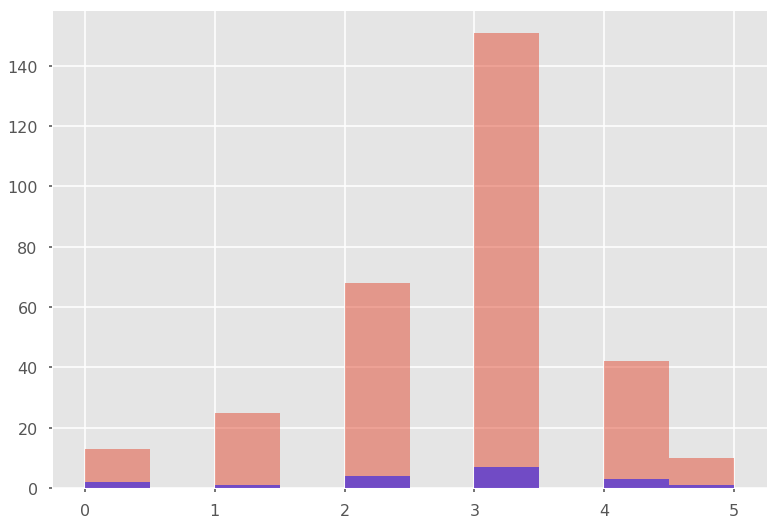

In [8]:
mpl.style.use('seaborn-poster') #sets the size of the charts
mpl.style.use('ggplot')
plt.hist(store_c1.ACansCount,alpha=0.5)
plt.hist(store_c2.ACansCount,alpha=0.5,color='blue')